선언부

In [1]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.cluster import silhouette_score
import mglearn

/home/minjoon/바탕화면/workspace/Tobigs_repo/venv/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/home/minjoon/바탕화면/workspace/Tobigs_repo/venv/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


데이터 입출력 및 전처리

In [2]:
data = pd.read_csv("Mall_Customers.csv", sep=",")

category_feature = [col for col in data.columns if data[col].dtypes == "object"]
continuous_feature = data.drop(category_feature, axis=1)
continuous_feature = continuous_feature.drop("Spending Score (1-100)", axis=1)

new_data = pd.DataFrame()
for col in category_feature:
    temp = []
    temp_value = []
    for index in data[col]:
        if index not in temp:
            temp.append(index)
            temp_value.append(len(temp))

        else:
            for num, i in enumerate(temp):
                if index == i:
                    temp_value.append(num)
    new_data[col] = temp_value

X = pd.concat([new_data, continuous_feature], axis=1)
y = data['Spending Score (1-100)']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_test_s = ss.transform(X_test)
new_data = pd.concat([X, y], axis=1)

1. 계층적 클러스터링

[[ 48.          49.           2.23606798   2.        ]
 [129.         131.           2.23606798   2.        ]
 [114.         115.           2.44948974   2.        ]
 [  3.           5.           2.64575131   2.        ]
 [ 65.          68.           3.16227766   2.        ]
 [ 13.          15.           3.60555128   2.        ]
 [ 83.          85.           3.60555128   2.        ]
 [117.         119.           3.60555128   2.        ]
 [156.         158.           3.60555128   2.        ]
 [106.         109.           3.74165739   2.        ]
 [150.         152.           3.87298335   2.        ]
 [137.         139.           4.           2.        ]
 [ 95.          97.           4.24264069   2.        ]
 [181.         183.           4.24264069   2.        ]
 [ 92.          96.           4.69041576   2.        ]
 [110.         209.           4.69041576   3.        ]
 [113.         202.           4.69041576   3.        ]
 [ 75.          78.           4.79583152   2.        ]
 [ 62.    

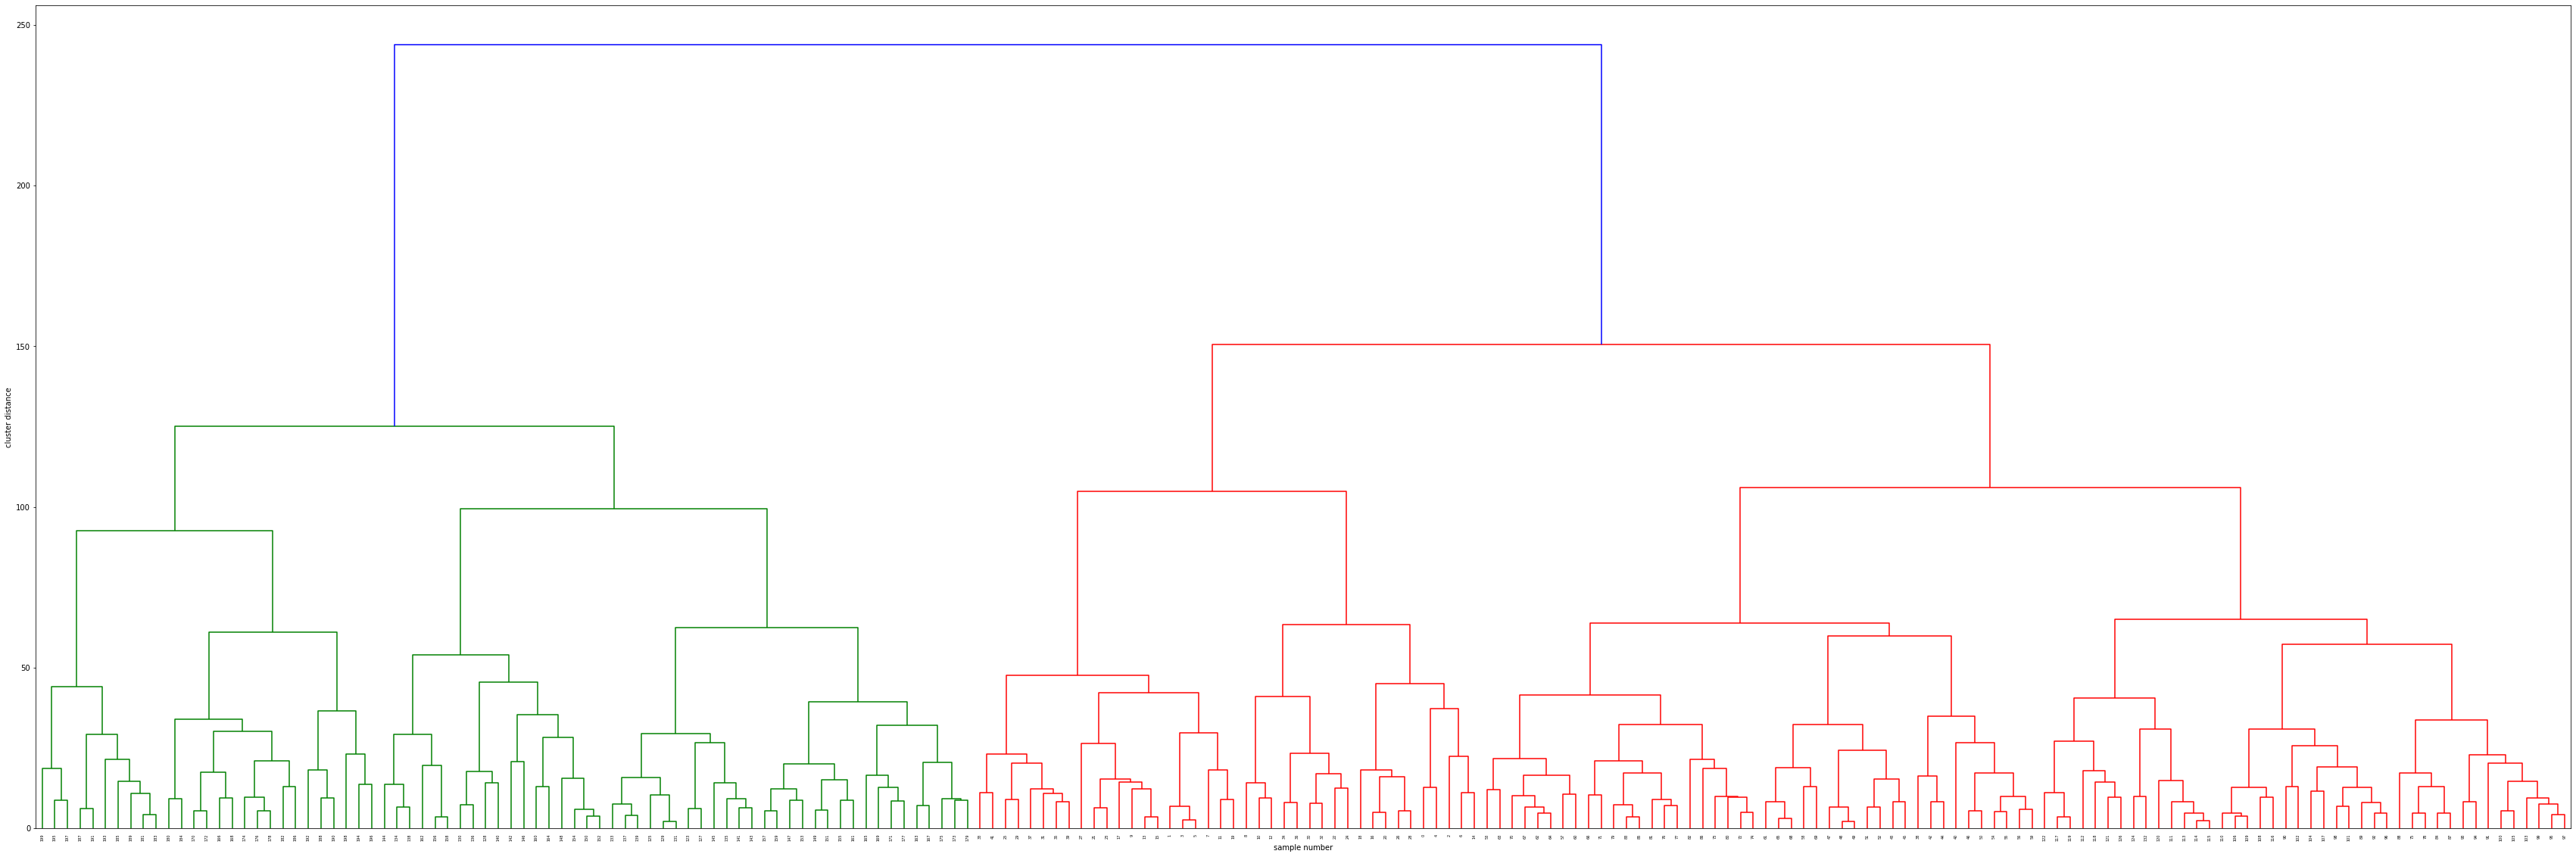

In [4]:
# 1. 계층적 클러스터링

mergings = linkage(new_data, method='complete') # 두 클러스터상에서 가장 먼 거리를 이용해서 측정하는 방식을 complete로 설
print(mergings) # The hierarchical clustering encoded as a linkage matrix. 클러스터 간의 거리 정보가 담긴거!

plt.figure(figsize =(60,20))
dendrogram(mergings)
plt.xlabel("sample number")
plt.ylabel("cluster distance")
plt.show()

2. K-means 클러스터링

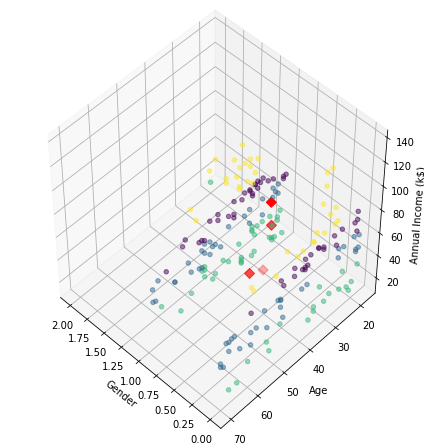

In [5]:
model = KMeans(n_clusters=4) # 4개로 나눌 것으로 지정, 속성이 4개라서 지정했습니다.
model.fit(X)
predict = pd.DataFrame(model.predict(X))
predict.columns = ['predict']
r = pd.concat([X, predict], axis=1)

centers = pd.DataFrame(model.cluster_centers_, columns=['Gender', 'CustomerID','Age', 'Annual Income (k$)'])
center_x = centers['Gender']
center_y = centers['Age']
center_z = centers['Annual Income (k$)']

fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(r['Gender'], r['Age'], r['Annual Income (k$)'], c=r['predict'], alpha=0.5)
ax.scatter(center_x, center_y, center_z, s=50, marker='D', c='r')
ax.set_xlabel('Gender')
ax.set_ylabel('Age')
ax.set_zlabel('Annual Income (k$)')
plt.show()

3. DBSCAN

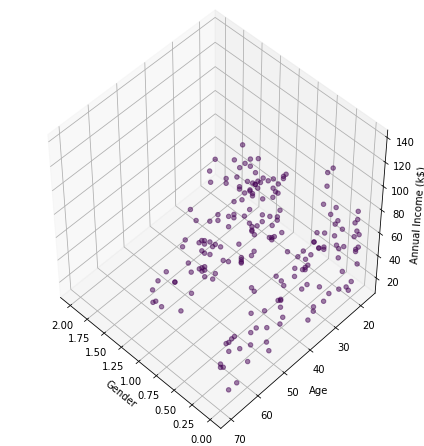

In [6]:
model = DBSCAN(eps=0.3, min_samples=6)
predict = pd.DataFrame(model.fit_predict(X))
predict.columns = ['predict']
r = pd.concat([X, predict], axis=1)

fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(r['Gender'], r['Age'], r['Annual Income (k$)'], c=r['predict'], alpha=0.5)
ax.set_xlabel('Gender')
ax.set_ylabel('Age')
ax.set_zlabel('Annual Income (k$)')
plt.show()

4. 모델 평가

실루엣 계수 구현코드에 대한 이해하고 구글링을 통해 찾은 코드를 사용하였습니다.
(실루엣 점수는 클러스터의 밀집 정도를 계산 -> 높을 수록 좋으며 최대는 1)
출처 : https://data-newbie.tistory.com/25

/home/minjoon/바탕화면/workspace/Tobigs_repo/venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/minjoon/바탕화면/workspace/Tobigs_repo/venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51089 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/minjoon/바탕화면/workspace/Tobigs_repo/venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/minjoon/바탕화면/workspace/Tobigs_repo/venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54624 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/minjoon/바탕화면/workspace/Tobigs_repo/venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45817 missing from current font.
  font.

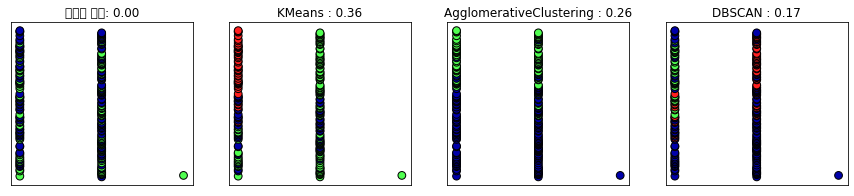

In [7]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# 비교를 위해 무작위로 클러스터 할당을 합니다
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# 무작위 할당한 클러스터를 그립니다
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title("무작위 할당: {:.2f}".format(
        silhouette_score(X_scaled, random_clusters)))

# 여기서 비교할 클러스터링 세 가지 방법을 선언
algorithms = [KMeans(n_clusters=4), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    # 클러스터 할당과 클러스터 중심을 그립니다
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3,
               s=60, edgecolors='black')
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                                      silhouette_score(X_scaled, clusters)))
plt.show()
# 마지막으로 실루엣 점수를 보고 평가 할 수 있음. K-means > AgglomerativeClustering > DBSCAN